In [11]:
import matplotlib.pyplot as plt
import os
import random

from skimage.feature import hog
from skimage import data, exposure, io


In [8]:
dataset_path = '../../data/vehicle-type-detection/'

def select_random_image():
    categories = ['hatchback', 'motorcycle', 'pickup', 'sedan', 'suv']
    
    selected_category = random.choice(categories)
    
    category_path = os.path.join(dataset_path, selected_category)
    
    image_files = os.listdir(category_path)
    
    selected_image = random.choice(image_files)
    
    image_path = os.path.join(category_path, selected_image)
    
    return image_path

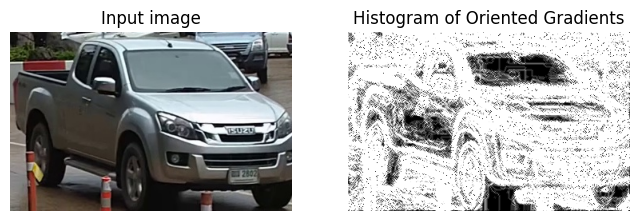

In [16]:
image = io.imread(select_random_image())

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(32, 32),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()